In [2]:
from autograd import grad

import autograd.numpy as np
import pickle as pkl
import json
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext cython

In [3]:
# Open the data file that contains the HIV protease data

df = pd.read_csv('../data/hiv_data/hiv-protease-data-expanded.csv', index_col=0)
df = df.dropna(subset=['FPV'])
df.head()

,ATV,DRV,FPV,IDV,LPV,NFV,SQV,SeqID,TPV,seqid,sequence,sequence_object,weight
0,NaN,NaN,2.5,16.3,NaN,38.6,16.1,2996,NaN,2996-0,PQITLWQRPIVTIKIGGQLKEALLDTGADDTVLEDVNLPGRWKPKM...,ID: 2996-0\nName: <unknown name>\nDescription:...,0.50
1,NaN,NaN,2.5,16.3,NaN,38.6,16.1,2996,NaN,2996-1,PQITLWQRPIVTIKIGGQLKEALLDTGADDTVLEDVNLPGRWKPKM...,ID: 2996-1\nName: <unknown name>\nDescription:...,0.50
2,NaN,NaN,0.7,0.8,NaN,0.8,1.1,4387,NaN,4387-0,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEDMELPGRWKPKM...,ID: 4387-0\nName: <unknown name>\nDescription:...,0.25
3,NaN,NaN,0.7,0.8,NaN,0.8,1.1,4387,NaN,4387-1,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEDMELPGRWKPKM...,ID: 4387-1\nName: <unknown name>\nDescription:...,0.25
4,NaN,NaN,0.7,0.8,NaN,0.8,1.1,4387,NaN,4387-2,PQITLWQRPLVTIKVGGQLKEALLDTGADDTVLEDMELPGRWKPKM...,ID: 4387-2\nName: <unknown name>\nDescription:...,0.25


In [4]:
# Open the numpy array of all graphs' data.
graph_arr = np.load('../data/feat_array.npy')

In [5]:
# Open the pickles that contain the graph information and node-nbr information.
def unpickle_data(path):
    with open(path, 'rb') as f:
        data = pkl.load(f)
    return data

graph_idxs = unpickle_data('../data/graph_idxs.pkl')
graph_nodes = unpickle_data('../data/graph_nodes.pkl')
nodes_nbrs = unpickle_data('../data/nodes_nbrs.pkl')

In [6]:
list(graph_idxs.keys())[0:5]
# len(graph_idxs.keys())

['7415-0', '257959-6', '90004-1', '112542-3', '60082-0']

In [7]:
list(graph_nodes.items())[0]

('7415-0',
 {648015: 'A70LYS',
  648016: 'A19LEU',
  648017: 'B73GLY',
  648018: 'A36MET',
  648019: 'B41ARG',
  648020: 'A12THR',
  648021: 'A24LEU',
  648022: 'B68GLY',
  648023: 'B4THR',
  648024: 'A88ASN',
  648025: 'A37ASN',
  648026: 'B2GLN',
  648027: 'A29ASP',
  648028: 'A6TRP',
  648029: 'A32VAL',
  648030: 'A3ILE',
  648031: 'B16GLY',
  648032: 'B75VAL',
  648033: 'A42TRP',
  648034: 'A34GLU',
  648035: 'A65GLU',
  648036: 'A53PHE',
  648037: 'A85ILE',
  648038: 'B6TRP',
  648039: 'A94GLY',
  648040: 'A93ILE',
  648041: 'A52GLY',
  648042: 'B66ILE',
  648043: 'A7GLN',
  648044: 'B70LYS',
  648045: 'B32VAL',
  648046: 'A2GLN',
  648047: 'B79PRO',
  648048: 'A44PRO',
  648049: 'A22ALA',
  648050: 'A82VAL',
  648051: 'B28ALA',
  648052: 'B94GLY',
  648053: 'B22ALA',
  648054: 'B40GLY',
  648055: 'B49GLY',
  648056: 'B76LEU',
  648057: 'B15ILE',
  648058: 'A28ALA',
  648059: 'A71VAL',
  648060: 'B84VAL',
  648061: 'B57LYS',
  648062: 'B71VAL',
  648063: 'B78GLY',
  648064: 'A20LY

In [8]:
list(nodes_nbrs.items())[0]

(0, [0, 23, 46])

In [9]:
# Keep track of only those that are in both the graph_idxs and in the df['seqid']
intersect = set(df['seqid'].values).intersection(graph_idxs.keys())
len(intersect)

3200

In [10]:
# Get a reduced list of graph_idxs.
graph_idxs_red = dict()
graph_nodes_red = dict()
for g in intersect:
    graph_idxs_red[g] = graph_idxs[g]
    graph_nodes_red[g] = graph_nodes[g]

In [11]:
graph_idxs_red['46213-0']

[535066,
 535067,
 535068,
 535069,
 535070,
 535071,
 535072,
 535073,
 535074,
 535075,
 535076,
 535077,
 535078,
 535079,
 535080,
 535081,
 535082,
 535083,
 535084,
 535085,
 535086,
 535087,
 535088,
 535089,
 535090,
 535091,
 535092,
 535093,
 535094,
 535095,
 535096,
 535097,
 535098,
 535099,
 535100,
 535101,
 535102,
 535103,
 535104,
 535105,
 535106,
 535107,
 535108,
 535109,
 535110,
 535111,
 535112,
 535113,
 535114,
 535115,
 535116,
 535117,
 535118,
 535119,
 535120,
 535121,
 535122,
 535123,
 535124,
 535125,
 535126,
 535127,
 535128,
 535129,
 535130,
 535131,
 535132,
 535133,
 535134,
 535135,
 535136,
 535137,
 535138,
 535139,
 535140,
 535141,
 535142,
 535143,
 535144,
 535145,
 535146,
 535147,
 535148,
 535149,
 535150,
 535151,
 535152,
 535153,
 535154,
 535155,
 535156,
 535157,
 535158,
 535159,
 535160,
 535161,
 535162,
 535163,
 535164,
 535165,
 535166,
 535167,
 535168,
 535169,
 535170,
 535171,
 535172,
 535173,
 535174,
 535175,
 535176,
 

In [12]:
graph_arr.shape

(659895, 36)

In [13]:
# Make one pass over the data to get the old/new index mapping, and
# make the final graph_array that gets passed in as an input.

def reindex_data_matrix(graph_idxs_red, graph_arr):
    """
    Parameters:
    ===========
    - graph_idxs_red: reduced graph indices
    - graph_arr: the original matrix of (nodes by node_features)
    
    Returns:
    ========
    - graph_arr_fin: a reduced matrix of (nodes by node_features)
    - nodes_oldnew, nodes_newold: mapping of new and old indices.
    """
    # Initialize a zero-matrix. 
    idxs = np.concatenate([i for i in graph_idxs_red.values()])
    graph_arr_fin = np.zeros(shape=graph_arr[idxs].shape)

    # Initialize empty maps of graph indices from the old to the new.
    nodes_oldnew = dict()  # {old_idx: new_idx}.
    nodes_newold = dict()  # {new_idx: old_idx}

    # Re-assign reduced graphs to the zero-matrix.
    curr_idx = 0
    for seqid, idxs in sorted(graph_idxs_red.items()):
        for idx in idxs:
            nodes_oldnew[idx] = curr_idx
            nodes_newold[curr_idx] = idx
            graph_arr_fin[curr_idx] = graph_arr[idx]
            curr_idx += 1
    return graph_arr_fin, nodes_oldnew, nodes_newold

graph_arr_fin, nodes_oldnew, nodes_newold = reindex_data_matrix(graph_idxs_red, graph_arr)

In [14]:
graph_arr_fin.shape

(622671, 36)

In [15]:
len(nodes_oldnew)

622671

In [16]:
len(nodes_newold)

622671

In [17]:
# Check a random sample of the indices to make sure that they are sampled correctly.
from random import sample

n_samples = 10000
rnd_idxs = sample([i for i in range(graph_arr_fin.shape[0])], n_samples)
for new_idx in rnd_idxs:
    assert np.all(np.equal(graph_arr_fin[new_idx], graph_arr[nodes_newold[new_idx]]))

In [18]:
graph_arr_fin.shape

(622671, 36)

In [19]:
# Finally, rework the nodes_nbrs, graph_idxs, and graph_nodes dictionaries with the corrected idxs.
# THIS IS THE KEY STEP! MUST ENCAPSULATE IN A FUNCTION!
from collections import defaultdict

def filter_and_reindex_nodes_and_neighbors(nodes_nbrs, nodes_oldnew):
    """
    - nodes_nbrs: a dictionary of nodes and their neighbors.
    - nodes_oldnew: a dictionary mapping old node indices to their new node indices.
    """
    nodes_nbrs_fin = defaultdict(list)
    
    for node, nbrs in sorted(nodes_nbrs.items()):
        if node in nodes_oldnew.keys():  # 
            for nbr in nbrs:
                nodes_nbrs_fin[nodes_oldnew[node]].append(nodes_oldnew[nbr])
    return nodes_nbrs_fin

nodes_nbrs_fin = filter_and_reindex_nodes_and_neighbors(nodes_nbrs, nodes_oldnew)

In [20]:
# Try writing the un_reindexer:
# nodes_nbrs_old = filter_and_reindex_nodes_and_neighbors(nodes_nbrs_fin, nodes_newold)

In [21]:
# for k, v in nodes_nbrs.items():
# #     assert v == nodes_nbrs_old[k], print(v, nodes_nbrs_old[k])

In [22]:
def filter_and_reindex_graph_idxs(graph_idxs, nodes_oldnew):
    """
    - graph_idxs: a dictionary of graphs and their original indices.
    - nodes_oldnew: a dictionary mapping old node indices to their new node indices.
    """
    graph_idxs_fin = defaultdict(list)
    for seqid, nodes in sorted(graph_idxs.items()):
        for node in nodes:
            if node in nodes_oldnew.keys():
                graph_idxs_fin[seqid].append(nodes_oldnew[node])
    return graph_idxs_fin

graph_idxs_fin = filter_and_reindex_graph_idxs(graph_idxs, nodes_oldnew)

In [23]:
def filter_and_reindex_graph_nodes(graph_nodes, nodes_oldnew):
    """
    - graph_nodes: a dictionary mapping graphs to their dictionary mapping indices to node names.
    - nodes_oldnew: a dictionary mapping old node indices to their new node indices.
    """    
    graph_nodes_fin = defaultdict(dict)
    for seqid, idx_node in sorted(graph_nodes.items()):
        for old_idx, node_name in idx_node.items():
            if old_idx in nodes_oldnew.keys():
                graph_nodes_fin[seqid][nodes_oldnew[old_idx]] = node_name
    return graph_nodes_fin

graph_nodes_fin = filter_and_reindex_graph_nodes(graph_nodes, nodes_oldnew)

In [24]:
%%cython

import cython
cimport numpy as np
import numpy as np

ctypedef np.float64_t DTYPE_t

def new_activations(inputs, nodes_nbrs):
    nodes_nbrs = dict(nodes_nbrs)
    return new_activations_(inputs, nodes_nbrs)

cdef new_activations_(inputs, nodes_nbrs):
    cdef np.ndarray[DTYPE_t, ndim=2] activations = np.zeros(shape=inputs.shape)
    cdef int n
    cdef list nbrs
    # cdef npsum = np.add.reduce
    cdef npsum = np.sum
    for n, nbrs in sorted(nodes_nbrs.items()):
        activations[n] = npsum(inputs[nbrs], axis=0)
        # activations[n] = node_nbr_acts_(inputs, nbrs)
        # activations[n] = axis_zero_sum(inputs[nbrs])
    return activations

#### TRY IMPLEMENTING NUMPY SUM HERE ####
cdef np.ndarray axis_zero_sum(input_arr):
    """
    Worth a shot? Let's see if this works better than calling np.sum all the time.
    """
    shape = input_arr.shape
    cdef int cols = input_arr.shape[1]
    cdef int col
    cdef float SUM
    cdef np.ndarray output = np.zeros(shape=(1, cols))

    for j in range(cols):
        output[col] = sum(input_arr[col])
    return output


#### TRYING SOMETHING DIFFERENT HERE ####

def dict_to_dense_array(dict_vals):
    return dict_to_dense_array_(dict_vals)

cdef np.ndarray dict_to_dense_array_(dict dict_vals):
    """
    Converts dictionary to dense array.
    """
    cdef np.ndarray array = np.zeros(shape=(len(dict_vals), len(dict_vals)))
    cdef int k
    cdef list v
    for k, v in dict_vals.items():
        array[k, v] = 1
        
    return array

def new_activations_dot(inputs, nodes_nbrs):
    idx_mat = dict_to_dense_array(dict(nodes_nbrs))
    
    return np.dot(idx_mat, inputs)

In [25]:
# %%prun
from random import sample, choice
all_nodes = [i for i in range(100)]
num_nbrs = [n for n in range(1, 10)]
arr = np.random.random(size=(len(all_nodes),len(all_nodes)))

node_nbrs = {i:sample(all_nodes, choice(num_nbrs)) for i in all_nodes}
# dict_vals = {0: [1, 2, 5], 
#              1: [2, 1, 3],
#              2: [3, 1, 5, 2],
#              3: [4, 3, 1],
#              4: [1, 2],
#              5: [3]}
# arr = dict_to_dense_array(dict_vals)
new_activations(arr, node_nbrs)

array([[ 0.89292931,  0.0272049 ,  0.28087526, ...,  0.35710826,
         0.03640007,  0.3262148 ],
       [ 3.12934883,  2.15908094,  3.86484089, ...,  3.90431393,
         5.19899145,  3.3422633 ],
       [ 3.31507919,  1.74025707,  4.37031848, ...,  2.75468566,
         2.5451117 ,  2.44405025],
       ..., 
       [ 1.25589857,  0.96534215,  1.69595138, ...,  1.89097902,
         1.54034847,  2.02348804],
       [ 2.77034719,  2.65180809,  2.67253074, ...,  2.98856057,
         2.9870072 ,  1.98191582],
       [ 4.26843477,  3.00766774,  5.13847833, ...,  3.8176885 ,
         3.1330377 ,  4.17118155]])

In [26]:
from graphfp.wb import WeightsAndBiases
import autograd.numpy as np
from graphfp.nonlinearity import relu
from autograd.numpy.numpy_extra import take

class GraphConvLayer(object):
    """
    A graph convolution layer. Convolution operation is:

        [self + nbrs] (shape=(1row x n_feats)) @ weights + bias
    """
    def __init__(self, weights_shape, biases_shape):
        """
        Parameters:
        ===========
        """
        self.weights_shape = weights_shape
        self.biases_shape = biases_shape
        self.wb = WeightsAndBiases()

    def __repr__(self):
        return "GraphConvLayer"

    def forward_pass(self, wb, inputs, nodes_nbrs, graph_idxs):
        """
        Parameters:
        ===========
        - inputs: (np.array) the output from the previous layer.
        - nodes_nbrs: (dict) keys=node_idxs, values=[self_idxs + nbr_idxs]
        - graph_idxs: (dict) keys=graph seqids, values=[node_idxs]
        """

        weights = wb['weights']
        biases = wb['biases']
        #--------------------------------#
        # activations = new_activations(inputs, nodes_nbrs)
        # print(activations.dtype)
        #--------------------------------#
        # ## This is the original
        # activations = np.zeros(shape=inputs.shape)
        # for n, nbrs in sorted(nodes_nbrs.items()):
        #     activations[n] = np.sum(getval(inputs[nbrs]), axis=0)
        #--------------------------------#
        # ## This is BAD!!! DO NOT UNCOMMENT
        # activations = new_activations_dot(inputs, nodes_nbrs)
        #--------------------------------#
        ## Courtesey of Jake Vanderplas, UW eScience Institute
        new_nbrs = np.full((inputs.shape[0], max(map(len, nodes_nbrs.values()))), -1, dtype=int)
        for i, v in nodes_nbrs.items():
            new_nbrs[i, :len(v)] = v
        # add a row of zeros to X
        new_inputs = np.vstack([inputs, 0 * inputs[0]])
        activations = new_inputs.take(new_nbrs, 0).sum(1)
        # activations = take(new_inputs, new_nbrs).sum(1)
        #--------------------------------#
        ## Trying a different version using scipy.sparse matrices. 
        
        return relu(np.dot(activations, weights) + biases)

    def build_weights(self):
        """
        Parameters:
        ===========
        - input_shape: (2-tuple) of integers.

        Returns:
        ========
        - output_shape: (2-tuple) of integers specifying the output shape.
        """
        self.wb.add(name='weights', shape=self.weights_shape)
        # self.wb.add(name='nbr_weights', shape=self.kernel_shape)
        self.wb.add(name='biases', shape=self.biases_shape)

        return self.wb

In [27]:
import operator as op


def to_sparse_format(dct):
    rows, cols = zip(*sorted(dct.items(), key=op.itemgetter(0)))
    rows = np.repeat(rows, list(map(len, cols)))
    cols = np.concatenate(cols)
    return rows.astype('int32'), cols.astype('int32')


node_nbrs_rows, node_nbrs_cols = to_sparse_format(nodes_nbrs_fin)

In [42]:
%%cython

import numpy as np
cimport numpy as np
from cython.parallel import prange
from cython import boundscheck, nonecheck, wraparound

def csr_binary_dot_left(rows, cols, inputs):
    out = np.zeros_like(inputs)
    _csr_binary_dot_left(rows, cols, inputs, out)
    return out

@nonecheck(False)
@wraparound(False)
@boundscheck(False)
cdef inline void _csr_binary_dot_left(int[::1] rows, int[::1] cols, double[:,::1] B, double[:,::1] out):
    cdef int idx, i, j, k
    print(B.shape)
    print(cols.shape)
    print(rows.shape)
    for idx in range(rows.shape[0]):
        i = rows[idx]
        k = cols[idx]
        for j in range(B.shape[1]):
            out[i,j] += B[k,j]

In [52]:
%%cython -a

cimport numpy as np
import numpy as np
from cython import boundscheck, nonecheck, wraparound

def csr_binary_dot_right(rows, cols, inputs):
    out = np.zeros_like(inputs)
    _csr_binary_dot_right(rows, cols, inputs, out)
    return out


@nonecheck(False)
@wraparound(False)
@boundscheck(False)
cdef inline void _csr_binary_dot_right(int[:] rows, int[:] cols, double[:,:] B, double[:,:] out):
    cdef int idx, i, j, k
    for idx in range(rows.shape[0]):
        j = rows[idx]
        k = cols[idx]
        for i in range(B.shape[1]):
            out[j, i] += B[k, i]

# @nonecheck(False)
# @wraparound(False)
@boundscheck(False)
cdef inline void _transpose(double[:,:] out, double[:,:] final):
    cdef int i, j
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            final[j, i] = out[i, j]
        

# def _csr_binary_dot_right(rows, cols, B, out):
#     """
#     Pass in the original.
#     """
#     for idx in range(rows.shape[0]):
#         j = rows[idx]
#         k = cols[idx]
#         for i in range(B.shape[1]):
#             out[j, i] += B[k, i]

In [32]:
graph_arr_fin.shape

(622671, 36)

In [33]:
node_nbrs_rows

array([     0,      0,      0, ..., 622669, 622669, 622670], dtype=int32)

In [34]:
node_nbrs_cols

array([     0,     23,      8, ..., 622527, 622506, 622670], dtype=int32)

In [39]:
%%prun
out1 = csr_binary_dot_left(node_nbrs_rows, node_nbrs_cols, graph_arr_fin)
print(out1)
print(out1.shape)

[622671, 36, 0, 0, 0, 0, 0, 0]
[2990113, 0, 0, 0, 0, 0, 0, 0]
[2990113, 0, 0, 0, 0, 0, 0, 0]
[[ 1.  0.  0. ...,  0.  1.  2.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  0.  7.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  1.  0. ...,  0.  6.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]
(622671, 36)
 

In [40]:
%%prun
out2 = csr_binary_dot_right(node_nbrs_rows, node_nbrs_cols, graph_arr_fin)
print(out2)
print(out2.shape)

[[ 1.  0.  0. ...,  0.  1.  2.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  0.  7.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  1.  0. ...,  0.  6.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]
(622671, 36)
 

In [116]:
%%prun

def new_nbrs_func(inputs, nodes_nbrs):
    new_nbrs = np.full((inputs.shape[0], max(map(len, nodes_nbrs.values()))), -1, dtype=int)
    for i, v in nodes_nbrs.items():
        new_nbrs[i, :len(v)] = v    
    return new_nbrs

new_nbrs = new_nbrs_func(graph_arr_fin, nodes_nbrs_fin)

In [75]:
%%prun
def jvdp(inputs, new_nbrs):
    # add a row of zeros to X
    new_inputs = np.vstack([inputs, 0 * inputs[0]])
    activations = new_inputs.take(new_nbrs, 0).sum(1)
    
jvdp(graph_arr_fin, new_nbrs)

In [160]:
%%prun
import operator as op
import numpy as np

def to_sparse_format(dct):
    rows, cols = zip(*sorted(dct.items(), key=op.itemgetter(0)))
    rows = np.repeat(rows, list(map(len, cols)))
    cols = np.concatenate(cols)
    
    return rows, cols

to_sparse_format(nodes_nbrs)

In [86]:
from graphfp.layers import FingerprintLayer, LinearRegressionLayer#, GraphConvLayer
from graphfp.utils import initialize_network
from pyflatten import flatten

layers = [# GraphConvLayer((36, 36)),
          GraphConvLayer(weights_shape=(36, 36), biases_shape=(1, 36)),
          FingerprintLayer(weights_shape=(36, 36), biases_shape=(1, 36)),
          LinearRegressionLayer(weights_shape=(36, 1), biases_shape=(1, 1)),
]

wb = initialize_network(layers_spec=layers)
wb_vect, unflattener = flatten(wb)

In [87]:
from random import sample

def batch_sample(inputs, nodes_nbrs, graph_idxs, n_graphs):
    """
    Randomly samples n_graphs from all of the graphs, returns new inputs,
    node_nbr dictionary, and graph_idx dictionary.
    """
    samp_graph_idxs = dict(sample(graph_idxs.items(), n_graphs))
    assert len(samp_graph_idxs) == n_graphs, "There was an error in sampling."
    concat_samp_idxs = np.concatenate([v for k, v in sorted(samp_graph_idxs.items())])
    # print('Samp Idxs Shape')
    # print(concat_samp_idxs.shape)
    samp_nodes_nbrs = {i: nodes_nbrs[i] for i in concat_samp_idxs}
    assert len(samp_nodes_nbrs) == len(concat_samp_idxs)

    samp_inputs, samp_nodes_oldnew, samp_nodes_newold = reindex_data_matrix(samp_graph_idxs, inputs)
    
    samp_nodes_nbrs = filter_and_reindex_nodes_and_neighbors(samp_nodes_nbrs, samp_nodes_oldnew)
    samp_graph_idxs = filter_and_reindex_graph_idxs(samp_graph_idxs, samp_nodes_oldnew)
    
    return samp_inputs, samp_nodes_nbrs, samp_graph_idxs


samp_inputs, samp_nodes_nbrs, samp_graph_idxs = batch_sample(graph_arr_fin, nodes_nbrs_fin, graph_idxs_fin, 100)

print(samp_inputs.shape)
print(len(samp_nodes_nbrs))
print(len(samp_graph_idxs))

(19502, 36)
19502
100


In [88]:
def predict(wb_struct, inputs, nodes_nbrs, graph_idxs, layers):
    curr_inputs = inputs
    
    for i, layer in enumerate(layers):
        wb = wb_struct['layer{0}_{1}'.format(i, layer)]
        curr_inputs = layer.forward_pass(wb, curr_inputs, nodes_nbrs, graph_idxs)
    return curr_inputs

In [89]:
# Scratchpad cell
samp_graph_idxs = dict(sample(graph_idxs.items(), 10))
assert len(samp_graph_idxs) == 10
concat_samp_idxs = np.concatenate([i for i in samp_graph_idxs.values()])
samp_nodes_nbrs = {i: nodes_nbrs[i] for i in concat_samp_idxs}
assert len(samp_nodes_nbrs) == len(concat_samp_idxs)

In [90]:
# samp_graph_arr, samp_nodes_nbrs, samp_graph_idxs = batch_sample(graph_arr_fin, nodes_nbrs_fin, graph_idxs_fin, 100)
# wb_struct = unflattener(wb_vect)

In [91]:
# %%prun 
# preds = predict(wb_struct, samp_graph_arr, samp_nodes_nbrs, samp_graph_idxs, layers)

In [98]:
# Prototype train_loss function
from pyflatten import flatten

wb_vect, unflattener = flatten(wb)

def get_actual(graph_idxs, df, preds):
    sorted_graphs = sorted(graph_idxs.keys())
    # print(sorted_graphs)
    sorted_resistances = df[df['seqid'].isin(sorted_graphs)].set_index('seqid').ix[sorted_graphs]['FPV'].values
    # print(sorted_resistances)
    actual = sorted_resistances.reshape(preds.shape)
    
    return actual

train_losses = []
preds_iter = []
actual_iter = []

def train_loss(wb_vect, unflattener):
    
    samp_graph_arr, samp_nodes_nbrs, samp_graph_idxs = batch_sample(graph_arr_fin, nodes_nbrs_fin, graph_idxs_fin, 3200)
    wb_struct = unflattener(wb_vect)
    preds = predict(wb_struct, samp_graph_arr, samp_nodes_nbrs, samp_graph_idxs, layers)
    
    # sorted_graphs = sorted(samp_graph_idxs.keys())
    # # print(sorted_graphs)
    # sorted_resistances = df[df['seqid'].isin(sorted_graphs)].set_index('seqid').ix[sorted_graphs]['FPV'].values
    # # print(sorted_resistances)
    # graph_scores = sorted_resistances.reshape(preds.shape)
    graph_scores = get_actual(samp_graph_idxs, df, preds)
    mse = np.mean(np.power(preds - graph_scores, 2))
    
    train_losses.append(mse)
    preds_iter.append(preds)
    actual_iter.append(graph_scores)
    print(mse)
    return mse

In [99]:
%%prun
train_loss(wb_vect, unflattener)

2381.73532415
 

In [100]:
gradfunc = grad(train_loss)  # how do I pass in kwargs?

In [101]:
from graphfp.optimizers import adam

In [102]:
from time import time
training_losses = []
def callback(wb, i):
    start = time()
    tl = train_loss(*flatten(wb))
    # if i % 10 == 0:
    # print(tl, time() - start)
    training_losses.append(tl)

In [103]:
wb_vect, unflattener = adam(gradfunc, wb, callback=None, num_iters=10000)

KeyboardInterrupt: 

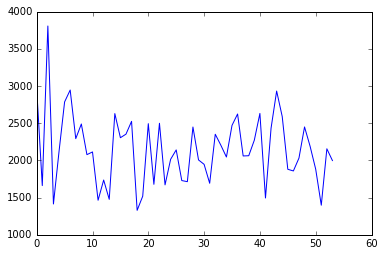

In [100]:
# %matplotlib inline

import matplotlib.pyplot as plt
from autograd.core import getval



plt.plot([getval(i) for i in train_losses])
# plt.yscale('log')

(-100, 1000)

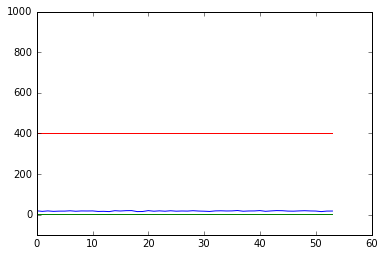

In [111]:
from pprint import pprint

means = []
mins = []
maxes = []
for i in actual_iter:
    means.append(np.mean(getval(i)))
    mins.append(np.min(getval(i)))
    maxes.append(np.max(getval(i)))

# getval(preds_iter[38]).mean()
plt.plot(means)
plt.plot(mins)
plt.plot(maxes)
# plt.yscale('log')
plt.ylim(-100, 1000)